In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

def segment_char(image_loc):
	img = cv2.imread(image_loc,0)
	img_copy = img.copy()
	img_trans = np.transpose(img)
	img_trans_copy = img_trans.copy()
	width = np.size(img_trans,1)
	line_ligature = []
	for i , val in enumerate(img_trans):
		if (sum(val) == 255 ):
			line_ligature.append(i)
	last = line_ligature[-1]
	res = consecutive(line_ligature)
	res = [i.tolist() for i in res]
	print ("res is \n\n",res)
	for val in res :
		print (val)
	times = 3
	while(times > 0):
		for i , val in enumerate(res):
			try:
				print (res[i+1][0] , val[-1] , res[i+1][0] - val[-1])
				if (res[i+1][0] - val[-1] < 30):
					val.append(res[i])
					res.remove(res[i])
			except:
				pass
		times = times - 1
		print ("RES IS ",res,"\n\n\n\n\n\n") 
	print ("fianl RES",res)

	rslt = []
	for val in res:
		n  = (sum(val) // len(val) )
		# if (len(val)>=7):
		rslt.append(n)
	print ("segm",rslt)

	for val in rslt:
	# if(last - val) > 50 :
		img_trans_copy[val] = [255] * width
	img_trans_copy = cv2.dilate(img_trans_copy , None , iterations = 1)
	plt.imshow(np.transpose(img_trans_copy))
	plt.show()
segment_char("lcts.png")
# segment_char("lrev.png")
# segment_char("lmat.png")
# segment_char("lcat.png")

AttributeError: 'NoneType' object has no attribute 'copy'

In [9]:
# find top and bottom layer 
image_loc = "lcat.png"
img = cv2.imread(image_loc,0)
areas_of = []
for i , val in enumerate(img):
    if (sum(val)>0):
        areas_of.append(i)
    else:
        pass


In [10]:
print (areas_of[0],areas_of[-1])

38 380


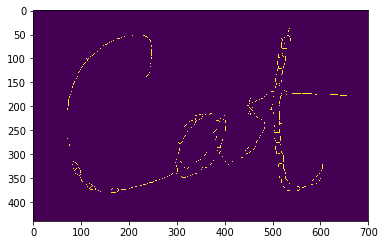

In [11]:
plt.imshow(img)

In [12]:
38+380

418

In [13]:
418/2

209.0

In [52]:
img[198] = [255]*700

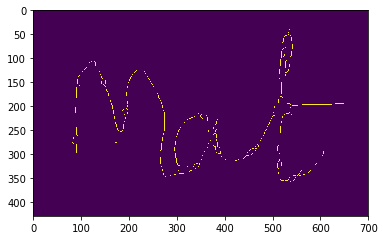

In [53]:
plt.imshow(img)

In [73]:
transpose = np.transpose(img)

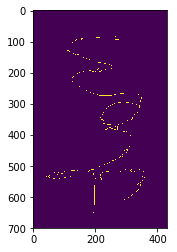

In [74]:
plt.imshow(transpose)

In [144]:
transpose = cv2.dilate(transpose , None , iterations = 1)

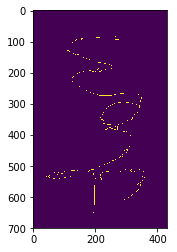

In [75]:
plt.imshow(transpose)

In [97]:
255*4

1020

In [76]:
line_ligature = []
for i ,val in enumerate(transpose):
    if( (sum(val[198:]) == 255) and sum(val) == 255): 
        line_ligature.append(i)
        print("Its There",i)

Its There 165
Its There 178
Its There 179
Its There 180
Its There 181
Its There 184
Its There 275
Its There 276
Its There 277
Its There 278
Its There 279
Its There 280
Its There 281
Its There 282
Its There 283
Its There 284
Its There 285
Its There 286
Its There 288
Its There 289
Its There 290
Its There 291
Its There 292
Its There 293
Its There 294
Its There 368
Its There 369
Its There 370
Its There 371
Its There 372
Its There 393
Its There 394
Its There 395
Its There 396
Its There 398
Its There 399
Its There 400
Its There 401
Its There 402
Its There 403
Its There 404
Its There 405
Its There 406
Its There 407
Its There 408
Its There 409
Its There 410
Its There 411
Its There 412
Its There 413
Its There 414
Its There 415
Its There 416
Its There 417
Its There 418
Its There 419
Its There 420
Its There 421
Its There 422
Its There 423
Its There 424
Its There 425
Its There 426
Its There 427
Its There 428
Its There 429
Its There 430
Its There 431
Its There 432
Its There 433
Its There 434
Its Th

In [77]:
trans_copy = transpose.copy()

In [78]:
width = np.size(trans_copy,1)

In [31]:
for val in line_ligature:
    trans_copy[val] = [255] * width

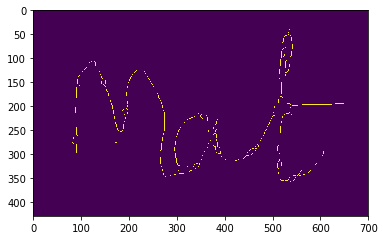

In [79]:
plt.imshow(np.transpose(trans_copy))

In [80]:
for val in line_ligature:
    print(val,end=",")

165,178,179,180,181,184,275,276,277,278,279,280,281,282,283,284,285,286,288,289,290,291,292,293,294,368,369,370,371,372,393,394,395,396,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,473,477,479,482,486,487,498,

In [81]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)


In [82]:
res = consecutive(line_ligature)

In [83]:
for val in res:
    print (val)

[165]
[178 179 180 181]
[184]
[275 276 277 278 279 280 281 282 283 284 285 286]
[288 289 290 291 292 293 294]
[368 369 370 371 372]
[393 394 395 396]
[398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433
 434 435 436 437 438 439 440 441 442 443 444 445]
[473]
[477]
[479]
[482]
[486 487]
[498]


In [84]:
arr = []

In [85]:
for i , val in enumerate(res):
    if(len(val) > 7):
        avg = sum(val) // len(val)
        arr.append(avg)

In [86]:
arr

[280, 421]

In [87]:
for val in arr:
#     if()
    trans_copy[val] = [255] * width

In [88]:
trans_copy = cv2.dilate(trans_copy,None,iterations=1)

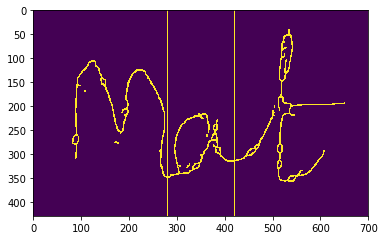

In [89]:
plt.imshow(np.transpose(trans_copy))

In [346]:
cv2.imwrite("dear_t.png",np.transpose(trans_copy))

True